In [ ]:
import scanpy as sc
import anndata as ad
import scanpy.external as sce

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

import gseapy as gp

import matplotlib.pyplot as plt
import seaborn as sns

import sccoda.util.data_generation as gen
import sccoda.util.comp_ana as mod

import scvi
import torch
import scipy.sparse as sp

from rich import print
import warnings
warnings.filterwarnings("ignore")
import os

outdir = "/Users/jessica/Documents/GitHub/Jessica_notebooks/write/03_batch_expression/PICA0001-PICA0007"
os.makedirs(outdir, exist_ok=True)
sc.settings.figdir = "/Users/jessica/Documents/GitHub/Jessica_notebooks/figures/PICA0001-PICA0007/03_abundance_change"

/Users/jessica/mambaforge/envs/scanpy/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
#load metadata
adata_cd4 =sc.read_h5ad("/Users/jessica/Documents/GitHub/Jessica_notebooks/write/02_cd4_batch_annotation/PICA0001-PICA0007/PICA0001-PICA0007_cd4_scVI_annot_tfh.h5ad")
adata_cd4.obs['cell_type'].unique()
adata_cd4.obs['cell_type'].value_counts()

cell_type
Naive/Central memory CD4 T cell    8057
Tfh / cTfh                          806
Th17-like memory CD4 T cell         424
Regulatory T cell                   267
Cycling CD4 T cell                  239
CCR6+ memory CD4 T cell             222
Cytotoxic CD4 T cell                 43
T stem-cell memory CD4 T cell         1
Name: count, dtype: int64

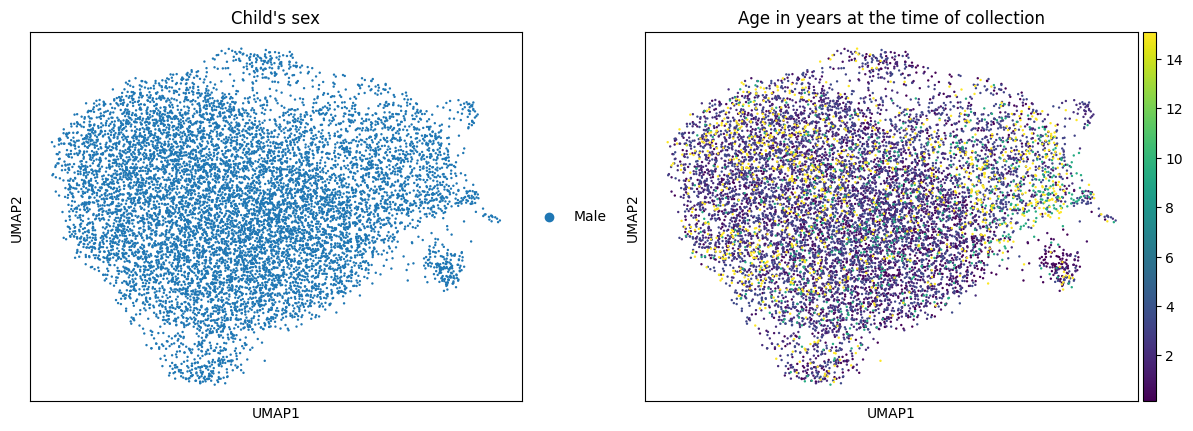

In [7]:
# load metadata
adata_cd4_with_meta = adata_cd4.copy()

meta = pd.read_csv("/Users/jessica/Documents/GitHub/Jessica_notebooks/data/PICA-PICAReportOverall_DATA_LABELS_2025-07-25_1224.csv", index_col=0)

meta.index = ["PICA" + str(i).zfill(4) for i in meta.index]

adata_cd4_with_meta.obs["pica_id"] = adata_cd4_with_meta.obs["pica_id"].astype("string")
adata_cd4_with_meta.obs = adata_cd4_with_meta.obs.join(meta, on="pica_id", how="left", rsuffix="_meta")

sc.pl.umap(adata_cd4_with_meta, color=["Child's sex", "Age in years at the time of collection"])

In [12]:
adata_cd4.obs_names_make_unique()
adata_cd4_with_meta.obs['Age in years at the time of collection'].value_counts()

Age in years at the time of collection
2.09     2407
3.17     1879
0.14     1633
0.83     1216
3.46     1214
15.09    1022
9.30      688
Name: count, dtype: int64